# TODO LIST Minggu, 26 Juni 2022

- [x] Dataset nya banyak yg duplicate brooo, ampas kali lah
- [x] Drop columns yang gk penting
- [ ] Lanjutin EDA

# [INSERT TITLE FOR THIS WORKSHOP]

by: shandytp

referensi bacaan : https://medium.com/crunchyroll/scaling-up-anime-with-machine-learning-and-smart-real-time-algorithms-2fb706ec56c0

titip: https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python

### Import Library 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Source
[Anime Dataset with Reviews - MyAnimeList](https://www.kaggle.com/datasets/marlesson/myanimelist-dataset-animes-profiles-reviews)

This dataset contains:

`- animes.csv`

`- reviews.csv`

`- profiles.csv`

In [2]:
DATA_PATH = 'data/'

In [3]:
data_anime = pd.read_csv(DATA_PATH + 'animes.csv')
data_review = pd.read_csv(DATA_PATH + 'reviews.csv')

In [4]:
print(data_anime.shape)
print(data_review.shape)

(19311, 12)
(192112, 7)


In [12]:
data_anime.head().T

,0,1,2,3,4
uid,28891,23273,34599,5114,31758
title,Haikyuu!! Second Season,Shigatsu wa Kimi no Uso,Made in Abyss,Fullmetal Alchemist: Brotherhood,Kizumonogatari III: Reiketsu-hen
synopsis,Following their participation at the Inter-Hig...,Music accompanies the path of the human metron...,The Abyss—a gaping chasm stretching down into ...,"""In order for something to be obtained, someth...",After helping revive the legendary vampire Kis...
genre,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","['Drama', 'Music', 'Romance', 'School', 'Shoun...","['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","['Action', 'Military', 'Adventure', 'Comedy', ...","['Action', 'Mystery', 'Supernatural', 'Vampire']"
aired,"Oct 4, 2015 to Mar 27, 2016","Oct 10, 2014 to Mar 20, 2015","Jul 7, 2017 to Sep 29, 2017","Apr 5, 2009 to Jul 4, 2010","Jan 6, 2017"
episodes,25.0,22.0,13.0,64.0,1.0
members,489888,995473,581663,1615084,214621
popularity,141,28,98,4,502
ranked,25.0,24.0,23.0,1.0,22.0
score,8.82,8.83,8.83,9.23,8.83


In [13]:
data_review.head().T

,0,1,2,3,4
uid,255938,259117,253664,8254,291149
profile,DesolatePsyche,baekbeans,skrn,edgewalker00,aManOfCulture99
anime_uid,34096,34599,28891,2904,4181
text,\n \n \n \n ...,\n \n \n \n ...,\n \n \n \n ...,\n \n \n \n ...,\n \n \n \n ...
score,8,10,7,9,10
scores,"{'Overall': '8', 'Story': '8', 'Animation': '8...","{'Overall': '10', 'Story': '10', 'Animation': ...","{'Overall': '7', 'Story': '7', 'Animation': '9...","{'Overall': '9', 'Story': '9', 'Animation': '9...","{'Overall': '10', 'Story': '10', 'Animation': ..."
link,https://myanimelist.net/reviews.php?id=255938,https://myanimelist.net/reviews.php?id=259117,https://myanimelist.net/reviews.php?id=253664,https://myanimelist.net/reviews.php?id=8254,https://myanimelist.net/reviews.php?id=291149


### Drop columns yang gak kepake 

In [15]:
data_anime = data_anime.drop(['synopsis', 'img_url', 'link'], axis=1)

In [16]:
data_anime.head().T

,0,1,2,3,4
uid,28891,23273,34599,5114,31758
title,Haikyuu!! Second Season,Shigatsu wa Kimi no Uso,Made in Abyss,Fullmetal Alchemist: Brotherhood,Kizumonogatari III: Reiketsu-hen
genre,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","['Drama', 'Music', 'Romance', 'School', 'Shoun...","['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","['Action', 'Military', 'Adventure', 'Comedy', ...","['Action', 'Mystery', 'Supernatural', 'Vampire']"
aired,"Oct 4, 2015 to Mar 27, 2016","Oct 10, 2014 to Mar 20, 2015","Jul 7, 2017 to Sep 29, 2017","Apr 5, 2009 to Jul 4, 2010","Jan 6, 2017"
episodes,25.0,22.0,13.0,64.0,1.0
members,489888,995473,581663,1615084,214621
popularity,141,28,98,4,502
ranked,25.0,24.0,23.0,1.0,22.0
score,8.82,8.83,8.83,9.23,8.83


In [17]:
data_review = data_review.drop(['link', 'text'], axis=1)

In [18]:
data_review.head().T

,0,1,2,3,4
uid,255938,259117,253664,8254,291149
profile,DesolatePsyche,baekbeans,skrn,edgewalker00,aManOfCulture99
anime_uid,34096,34599,28891,2904,4181
score,8,10,7,9,10
scores,"{'Overall': '8', 'Story': '8', 'Animation': '8...","{'Overall': '10', 'Story': '10', 'Animation': ...","{'Overall': '7', 'Story': '7', 'Animation': '9...","{'Overall': '9', 'Story': '9', 'Animation': '9...","{'Overall': '10', 'Story': '10', 'Animation': ..."


### Check duplicated values

Ternyata data ini memiliki banyak duplicate values zzz

In [19]:
data_anime[data_anime.duplicated()]

,uid,title,genre,aired,episodes,members,popularity,ranked,score
3065,18483,Bishoujo Animerama: Manami no Michi Tono Sou N...,"['Hentai', 'Sci-Fi']","Feb 22, 1990",1.0,463,11171,NaN,4.17
3071,29111,Onna Spy Goumon: Teki no Ajito wa Jotai Goumonsho,['Hentai'],2001,1.0,322,11982,NaN,4.46
3077,28891,Haikyuu!! Second Season,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82
3078,23273,Shigatsu wa Kimi no Uso,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83
3079,34599,Made in Abyss,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83
...,...,...,...,...,...,...,...,...,...
19306,32979,Flip Flappers,"['Sci-Fi', 'Adventure', 'Comedy', 'Magic']","Oct 6, 2016 to Dec 29, 2016",13.0,134252,843,1070.0,7.73
19307,123,Fushigi Yuugi,"['Adventure', 'Fantasy', 'Magic', 'Martial Art...","Apr 6, 1995 to Mar 28, 1996",52.0,84407,1292,1071.0,7.73
19308,1281,Gakkou no Kaidan,"['Mystery', 'Horror', 'Supernatural']","Oct 22, 2000 to Mar 25, 2001",19.0,83093,1314,1073.0,7.73
19309,450,InuYasha Movie 2: Kagami no Naka no Mugenjo,"['Action', 'Adventure', 'Comedy', 'Historical'...","Dec 21, 2002",1.0,71989,1469,1077.0,7.73


In [20]:
data_anime[data_anime['uid'] == 5114]

,uid,title,genre,aired,episodes,members,popularity,ranked,score
3,5114,Fullmetal Alchemist: Brotherhood,"['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23
3080,5114,Fullmetal Alchemist: Brotherhood,"['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23


In [21]:
data_anime[data_anime['uid'] == 32979]

,uid,title,genre,aired,episodes,members,popularity,ranked,score
1092,32979,Flip Flappers,"['Sci-Fi', 'Adventure', 'Comedy', 'Magic']","Oct 6, 2016 to Dec 29, 2016",13.0,134252,843,1070.0,7.73
3107,32979,Flip Flappers,"['Sci-Fi', 'Adventure', 'Comedy', 'Magic']","Oct 6, 2016 to Dec 29, 2016",13.0,134191,842,1070.0,7.73
19306,32979,Flip Flappers,"['Sci-Fi', 'Adventure', 'Comedy', 'Magic']","Oct 6, 2016 to Dec 29, 2016",13.0,134252,843,1070.0,7.73


In [24]:
data_anime = data_anime.drop_duplicates('uid', keep='last')

In [25]:
data_anime[data_anime['uid'] == 5114]

,uid,title,genre,aired,episodes,members,popularity,ranked,score
3080,5114,Fullmetal Alchemist: Brotherhood,"['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23


In [26]:
data_anime[data_anime['uid'] == 34599]

,uid,title,genre,aired,episodes,members,popularity,ranked,score
3079,34599,Made in Abyss,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83


### Ternyata ada missing values brrroooo

Apakah kita biarkan saja atau gimana enaknya?

In [23]:
data_anime.isna().sum()

uid              0
title            0
genre            0
aired            0
episodes       706
members          0
popularity       0
ranked        3212
score          579
dtype: int64

In [33]:
data_anime[data_anime['ranked'].isnull() == True]

,uid,title,genre,aired,episodes,members,popularity,ranked,score
3046,9317,Doll Saaya,['Hentai'],"Jul 27, 2001",1.0,609,10559,NaN,4.61
3047,40639,Tonari no Ie no Anette-san The Animation,['Hentai'],"Jan 31, 2020 to ?",NaN,766,10060,NaN,NaN
3048,38339,Suzumi-bune,"['Hentai', 'Historical']",1932,1.0,137,14670,NaN,5.00
3049,40022,Onii-chan Asa made Zutto Gyutte Shite!,['Hentai'],2019 to ?,NaN,300,12405,NaN,NaN
3050,40471,Nozoki Kanojo,['Hentai'],"Dec 27, 2019 to ?",NaN,314,12062,NaN,5.91
...,...,...,...,...,...,...,...,...,...
17487,34506,Idol Kyousei Sousa,['Hentai'],"Feb 24, 2017 to ?",NaN,2224,7696,NaN,4.68
17488,5586,Aoi Yousei,['Hentai'],"Dec 21, 2001",1.0,713,10200,NaN,4.85
17491,5545,Heisei Jogakuen Kagai Lesson,['Hentai'],"Apr 27, 2001",1.0,863,9835,NaN,4.67
17492,6622,Gakuen Maria: Bakunyuu Teachers,['Hentai'],"Jun 25, 2002",1.0,1422,8748,NaN,5.20


### Rename columns agar mudah untuk melakukan merge nanti

In [36]:
data_anime = data_anime.rename(columns = {'uid':'anime_uid'})

In [37]:
data_anime.head()

,anime_uid,title,genre,aired,episodes,members,popularity,ranked,score
3046,9317,Doll Saaya,['Hentai'],"Jul 27, 2001",1.0,609,10559,NaN,4.61
3047,40639,Tonari no Ie no Anette-san The Animation,['Hentai'],"Jan 31, 2020 to ?",NaN,766,10060,NaN,NaN
3048,38339,Suzumi-bune,"['Hentai', 'Historical']",1932,1.0,137,14670,NaN,5.00
3049,40022,Onii-chan Asa made Zutto Gyutte Shite!,['Hentai'],2019 to ?,NaN,300,12405,NaN,NaN
3050,40471,Nozoki Kanojo,['Hentai'],"Dec 27, 2019 to ?",NaN,314,12062,NaN,5.91


In [38]:
data_anime[data_anime['title'] == 'Shigatsu wa Kimi no Uso']

,anime_uid,title,genre,aired,episodes,members,popularity,ranked,score
3078,23273,Shigatsu wa Kimi no Uso,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83


Terlalu pusing broo, mari kita reset index nya

In [50]:
data_anime = data_anime.reset_index(drop=True).drop(['index'],axis=1)

In [51]:
data_anime

,anime_uid,title,genre,aired,episodes,members,popularity,ranked,score
0,9317,Doll Saaya,['Hentai'],"Jul 27, 2001",1.0,609,10559,NaN,4.61
1,40639,Tonari no Ie no Anette-san The Animation,['Hentai'],"Jan 31, 2020 to ?",NaN,766,10060,NaN,NaN
2,38339,Suzumi-bune,"['Hentai', 'Historical']",1932,1.0,137,14670,NaN,5.00
3,40022,Onii-chan Asa made Zutto Gyutte Shite!,['Hentai'],2019 to ?,NaN,300,12405,NaN,NaN
4,40471,Nozoki Kanojo,['Hentai'],"Dec 27, 2019 to ?",NaN,314,12062,NaN,5.91
...,...,...,...,...,...,...,...,...,...
16211,32979,Flip Flappers,"['Sci-Fi', 'Adventure', 'Comedy', 'Magic']","Oct 6, 2016 to Dec 29, 2016",13.0,134252,843,1070.0,7.73
16212,123,Fushigi Yuugi,"['Adventure', 'Fantasy', 'Magic', 'Martial Art...","Apr 6, 1995 to Mar 28, 1996",52.0,84407,1292,1071.0,7.73
16213,1281,Gakkou no Kaidan,"['Mystery', 'Horror', 'Supernatural']","Oct 22, 2000 to Mar 25, 2001",19.0,83093,1314,1073.0,7.73
16214,450,InuYasha Movie 2: Kagami no Naka no Mugenjo,"['Action', 'Adventure', 'Comedy', 'Historical'...","Dec 21, 2002",1.0,71989,1469,1077.0,7.73


### Capstone baru

In [53]:
data_review.head().T

,0,1,2,3,4
uid,255938,259117,253664,8254,291149
profile,DesolatePsyche,baekbeans,skrn,edgewalker00,aManOfCulture99
anime_uid,34096,34599,28891,2904,4181
score,8,10,7,9,10
scores,"{'Overall': '8', 'Story': '8', 'Animation': '8...","{'Overall': '10', 'Story': '10', 'Animation': ...","{'Overall': '7', 'Story': '7', 'Animation': '9...","{'Overall': '9', 'Story': '9', 'Animation': '9...","{'Overall': '10', 'Story': '10', 'Animation': ..."


In [56]:
data_review[data_review['uid'].duplicated()]

,uid,profile,anime_uid,score,scores
54267,321837,shoxs84,40269,9,"{'Overall': '9', 'Story': '10', 'Animation': '..."
54268,321498,Hei316,40269,9,"{'Overall': '9', 'Story': '7', 'Animation': '8..."
54269,322786,Ayanamihhh,40269,10,"{'Overall': '10', 'Story': '10', 'Animation': ..."
54270,321183,Zaky1435,40269,9,"{'Overall': '9', 'Story': '9', 'Animation': '8..."
54271,321148,YeeYeeAss,40269,10,"{'Overall': '10', 'Story': '0', 'Animation': '..."
...,...,...,...,...,...
192107,240067,Unicorn819,1281,9,"{'Overall': '9', 'Story': '5', 'Animation': '1..."
192108,285777,ShizzoSVH,1281,9,"{'Overall': '9', 'Story': '7', 'Animation': '9..."
192109,286904,AlluMan96,1281,3,"{'Overall': '3', 'Story': '3', 'Animation': '1..."
192110,287903,AgentK300,1281,10,"{'Overall': '10', 'Story': '3', 'Animation': '..."


### Merge dataset 

In [57]:
anime_fulldata = pd.merge(
    data_anime,
    data_review,
    how='right',
    on='anime_uid',
    suffixes=['', '_user']
)

In [59]:
anime_fulldata.head().T

,0,1,2,3,4
anime_uid,34096,34599,28891,2904,4181
title,Gintama.,Made in Abyss,Haikyuu!! Second Season,Code Geass: Hangyaku no Lelouch R2,Clannad: After Story
genre,"['Action', 'Comedy', 'Historical', 'Parody', '...","['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","['Action', 'Military', 'Sci-Fi', 'Super Power'...","['Slice of Life', 'Comedy', 'Supernatural', 'D..."
aired,"Jan 9, 2017 to Mar 27, 2017","Jul 7, 2017 to Sep 29, 2017","Oct 4, 2015 to Mar 27, 2016","Apr 6, 2008 to Sep 28, 2008","Oct 3, 2008 to Mar 27, 2009"
episodes,12.0,13.0,25.0,25.0,24.0
members,139309,581663,489888,992196,740101
popularity,800,98,141,27,64
ranked,15.0,23.0,25.0,17.0,12.0
score,8.94,8.83,8.82,8.93,8.97
uid,255938,259117,253664,8254,291149


In [60]:
anime_fulldata[anime_fulldata['uid'] == 255938]

,anime_uid,title,genre,aired,episodes,members,popularity,ranked,score,uid,profile,score_user,scores
0,34096,Gintama.,"['Action', 'Comedy', 'Historical', 'Parody', '...","Jan 9, 2017 to Mar 27, 2017",12.0,139309,800,15.0,8.94,255938,DesolatePsyche,8,"{'Overall': '8', 'Story': '8', 'Animation': '8..."
60897,34096,Gintama.,"['Action', 'Comedy', 'Historical', 'Parody', '...","Jan 9, 2017 to Mar 27, 2017",12.0,139309,800,15.0,8.94,255938,DesolatePsyche,8,"{'Overall': '8', 'Story': '8', 'Animation': '8..."


In [70]:
anime_fulldata[anime_fulldata['anime_uid'] == 23273].head()

,anime_uid,title,genre,aired,episodes,members,popularity,ranked,score,uid,profile,score_user,scores
30704,23273,Shigatsu wa Kimi no Uso,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,189379,phs_togusa,6,"{'Overall': '6', 'Story': '5', 'Animation': '9..."
30705,23273,Shigatsu wa Kimi no Uso,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,182731,Glacialis,9,"{'Overall': '9', 'Story': '9', 'Animation': '8..."
30706,23273,Shigatsu wa Kimi no Uso,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,192084,alphacompton,6,"{'Overall': '6', 'Story': '9', 'Animation': '1..."
30707,23273,Shigatsu wa Kimi no Uso,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,183046,Tozzy,6,"{'Overall': '6', 'Story': '6', 'Animation': '8..."
30708,23273,Shigatsu wa Kimi no Uso,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,187134,guywholikesanime,4,"{'Overall': '4', 'Story': '3', 'Animation': '1..."


In [71]:
anime_fulldata = anime_fulldata.rename(
    columns={'name': 'anime_title', 'rating_user': 'user_rating'}
)

print(anime_fulldata.shape)

(192112, 13)


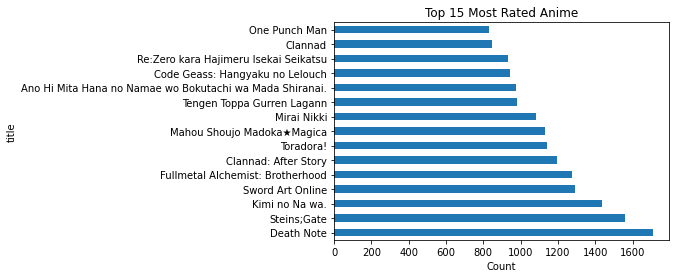

In [72]:
dfct = anime_fulldata.groupby('title').size().sort_values(ascending=False)

dfct.head(15).plot.barh()
plt.title('Top 15 Most Rated Anime')
plt.xlabel('Count')
plt.show()

In [ ]:
data_review.head().T

,0,1,2,3,4
uid,255938,259117,253664,8254,291149
profile,DesolatePsyche,baekbeans,skrn,edgewalker00,aManOfCulture99
anime_uid,34096,34599,28891,2904,4181
text,\n \n \n \n ...,\n \n \n \n ...,\n \n \n \n ...,\n \n \n \n ...,\n \n \n \n ...
score,8,10,7,9,10
scores,"{'Overall': '8', 'Story': '8', 'Animation': '8...","{'Overall': '10', 'Story': '10', 'Animation': ...","{'Overall': '7', 'Story': '7', 'Animation': '9...","{'Overall': '9', 'Story': '9', 'Animation': '9...","{'Overall': '10', 'Story': '10', 'Animation': ..."
link,https://myanimelist.net/reviews.php?id=255938,https://myanimelist.net/reviews.php?id=259117,https://myanimelist.net/reviews.php?id=253664,https://myanimelist.net/reviews.php?id=8254,https://myanimelist.net/reviews.php?id=291149


In [ ]:
data_review[data_review['uid'] == 259117]

,uid,profile,anime_uid,score,scores
1,259117,baekbeans,34599,10,"{'Overall': '10', 'Story': '10', 'Animation': ..."
60898,259117,baekbeans,34599,10,"{'Overall': '10', 'Story': '10', 'Animation': ..."


In [32]:
data_review[data_review['uid'] == 182712]

,uid,profile,anime_uid,text,score,scores,link
30723,182712,henyome,23273,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=182712
149999,182712,henyome,23273,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=182712


In [67]:
data_review['uid'][data_review['anime_uid'] == 23273].duplicated

<bound method Series.duplicated of 30704     189379
30705     182731
30706     192084
30707     183046
30708     187134
30709     183884
30710     303196
30711     182940
30712     180393
30713     186483
30714     183766
30715     183254
30716     191109
30717     183410
30718     172881
30719     182727
30720     182739
30721     183128
30722     182775
30723     182712
149907    189379
149914    182731
149915    192084
149917    183046
149933    187134
149935    183884
149940    303196
149944    182940
149947    180393
149950    186483
149952    183766
149955    183254
149965    191109
149969    183410
149972    172881
149975    182727
149978    182739
149980    183128
149992    182775
149999    182712
Name: uid, dtype: int64>

In [68]:
data_review[data_review['uid'] == 182731]

,uid,profile,anime_uid,score,scores
30705,182731,Glacialis,23273,9,"{'Overall': '9', 'Story': '9', 'Animation': '8..."
149914,182731,Glacialis,23273,9,"{'Overall': '9', 'Story': '9', 'Animation': '8..."


In [24]:
anime_fulldata = pd.merge(
    data_anime,
    data_review,
    how='right',
    on='anime_uid',
    suffixes=['', '_user']
)

In [ ]:
anime_fulldata = anime_fulldata.rename(
    columns={'name': 'anime_title', 'rating_user': 'user_rating'}
)

print(anime_fulldata.shape)

In [27]:
anime_fulldata.head(10).T

,0,1,2,3,4,5,6,7,8,9
anime_uid,34096,34096,34599,34599,28891,28891,2904,2904,4181,4181
title,Gintama.,Gintama.,Made in Abyss,Made in Abyss,Haikyuu!! Second Season,Haikyuu!! Second Season,Code Geass: Hangyaku no Lelouch R2,Code Geass: Hangyaku no Lelouch R2,Clannad: After Story,Clannad: After Story
synopsis,After joining the resistance against the bakuf...,After joining the resistance against the bakuf...,The Abyss—a gaping chasm stretching down into ...,The Abyss—a gaping chasm stretching down into ...,Following their participation at the Inter-Hig...,Following their participation at the Inter-Hig...,"One year has passed since the Black Rebellion,...","One year has passed since the Black Rebellion,...","Clannad: After Story , the sequel to the criti...","Clannad: After Story , the sequel to the criti..."
genre,"['Action', 'Comedy', 'Historical', 'Parody', '...","['Action', 'Comedy', 'Historical', 'Parody', '...","['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","['Action', 'Military', 'Sci-Fi', 'Super Power'...","['Action', 'Military', 'Sci-Fi', 'Super Power'...","['Slice of Life', 'Comedy', 'Supernatural', 'D...","['Slice of Life', 'Comedy', 'Supernatural', 'D..."
aired,"Jan 9, 2017 to Mar 27, 2017","Jan 9, 2017 to Mar 27, 2017","Jul 7, 2017 to Sep 29, 2017","Jul 7, 2017 to Sep 29, 2017","Oct 4, 2015 to Mar 27, 2016","Oct 4, 2015 to Mar 27, 2016","Apr 6, 2008 to Sep 28, 2008","Apr 6, 2008 to Sep 28, 2008","Oct 3, 2008 to Mar 27, 2009","Oct 3, 2008 to Mar 27, 2009"
episodes,12.0,12.0,13.0,13.0,25.0,25.0,25.0,25.0,24.0,24.0
members,139309,139309,581663,581663,489888,489888,992196,992196,740101,740101
popularity,800,800,98,98,141,141,27,27,64,64
ranked,15.0,15.0,23.0,23.0,25.0,25.0,17.0,17.0,12.0,12.0
score,8.94,8.94,8.83,8.83,8.82,8.82,8.93,8.93,8.97,8.97


In [31]:
anime_fulldata[anime_fulldata['anime_uid'] == 23273]

,anime_uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link,uid,profile,text,score_user,scores,link_user
61408,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...,189379,phs_togusa,\n \n \n \n ...,6,"{'Overall': '6', 'Story': '5', 'Animation': '9...",https://myanimelist.net/reviews.php?id=189379
61409,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...,189379,phs_togusa,\n \n \n \n ...,6,"{'Overall': '6', 'Story': '5', 'Animation': '9...",https://myanimelist.net/reviews.php?id=189379
61410,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...,182731,Glacialis,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '8...",https://myanimelist.net/reviews.php?id=182731
61411,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...,182731,Glacialis,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '8...",https://myanimelist.net/reviews.php?id=182731
61412,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...,192084,alphacompton,\n \n \n \n ...,6,"{'Overall': '6', 'Story': '9', 'Animation': '1...",https://myanimelist.net/reviews.php?id=192084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246949,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...,183128,Bikhal,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '9', 'Animation': '...",https://myanimelist.net/reviews.php?id=183128
246964,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...,182775,streetlights,\n \n \n \n ...,4,"{'Overall': '4', 'Story': '3', 'Animation': '7...",https://myanimelist.net/reviews.php?id=182775
246965,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...,182775,streetlights,\n \n \n \n ...,4,"{'Overall': '4', 'Story': '3', 'Animation': '7...",https://myanimelist.net/reviews.php?id=182775
246974,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...,182712,henyome,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9',

In [43]:
dfct = anime_fulldata.groupby('title').size().sort_values(ascending=False)

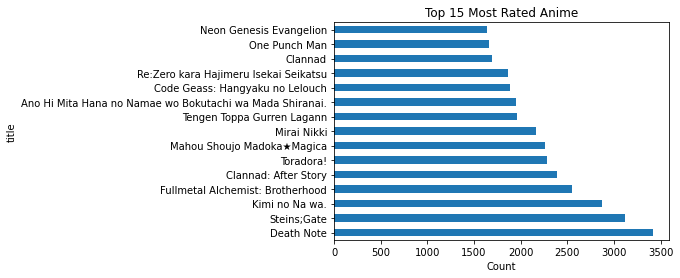

In [48]:
dfct = anime_fulldata.groupby('title').size().sort_values(ascending=False)

dfct.head(15).plot.barh()
plt.title('Top 15 Most Rated Anime')
plt.xlabel('Count')
plt.show()